## Set up

In [1]:
%run -i ../notebooks/functions/functions.py
%run -i ../notebooks/functions/ML_functions.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
master_df = pd.read_csv('../processed_data/master.csv')

#split out lat, long info
X = master_df.iloc[:, 2:]
lat_lng = master_df.iloc[:, 0:2]

In [5]:
#Scaling the data
scaler = StandardScaler()
#fit scaler to data
scaler.fit(X.values)

#transform and save into new dataframe
X_std = pd.DataFrame(scaler.transform(X.values), 
                                columns = X.columns)
    
X_std.head()

,Population,traffic,ped_traffic,buildings/hotels,acres,buildings/libraries,PARKING LOTS AND GARAGES,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS,"STREETSCAPES, PLAZAS, AND MALLS",BUS DEPOTS AND TERMINALS,MUSEUMS,COLLEGES OR UNIVERSITIES
0,-0.837351,-0.637258,-0.379571,-0.197862,0.834789,-0.152898,0.308110,-0.346456,-1.017448,-0.865971,-0.598052,0.133838,0.173855,-0.437422
1,-0.636818,-0.119831,-0.379571,-0.214343,1.579880,-0.152898,-0.530724,-0.496921,-0.675080,-0.865971,-0.598052,-0.368053,-0.410658,-0.437422
2,-0.952083,0.069818,-0.379571,-0.214343,0.461823,-1.572667,-0.635578,-0.647387,-1.017448,-0.666603,-0.932207,0.133838,0.173855,-0.437422
3,-1.886269,-0.795459,-0.379571,-0.230824,-0.392163,-1.572667,-0.688006,-0.797852,-1.017448,-1.464073,-0.932207,-0.368053,-0.410658,-0.437422
4,-0.054161,0.075751,-0.379571,-0.230824,0.765566,-0.152898,-0.583151,-0.045525,-1.017448,-0.267868,-0.598052,-0.368053,-0.410658,-0.437422


## Radar Plots

### K-means

In [6]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', random_state=1)
## clustering
clusters = model.fit_predict(X_std)

#Create dataframe with scaled data and cluster info
cluster_df = pd.concat([X_std, pd.DataFrame(clusters)], axis=1)
cluster_df = cluster_df.rename(columns = {0: 'clusters'})

In [7]:
df_list = []
X_plt = pd.concat([lat_lng, cluster_df], axis=1)
#for each cluster seperate from master dataframe and append to list
for i in range(0, k):
    df_list.append(X_plt.loc[X_plt['clusters'] == i])

#zip each clustered dataframe in the list
cluster_dfs = llz_set(df_list)

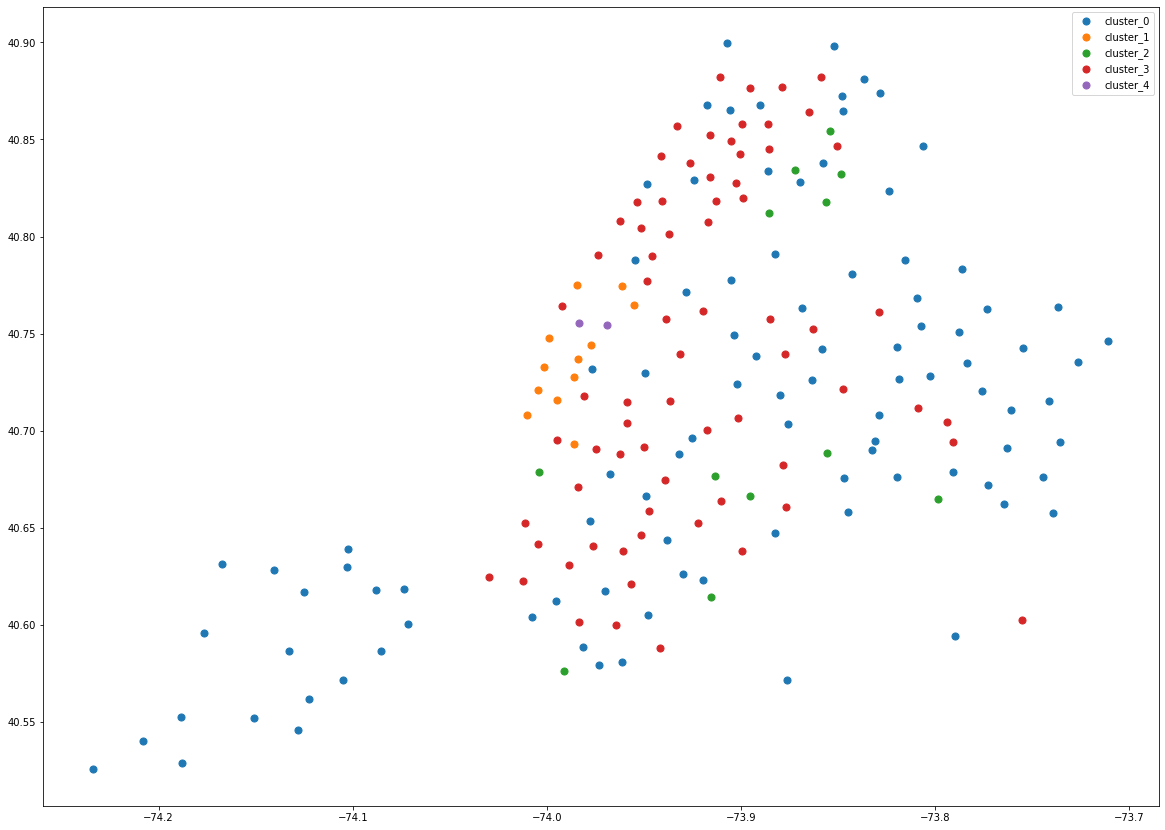

In [8]:
fig,ax=plt.subplots(figsize=(20,20))

#loop through each cluster
for i in range(len(cluster_dfs)):
    cluster_dfs[i].plot(ax = ax, markersize = 50, marker = 'o', label = f"cluster_{i}")
plt.legend()

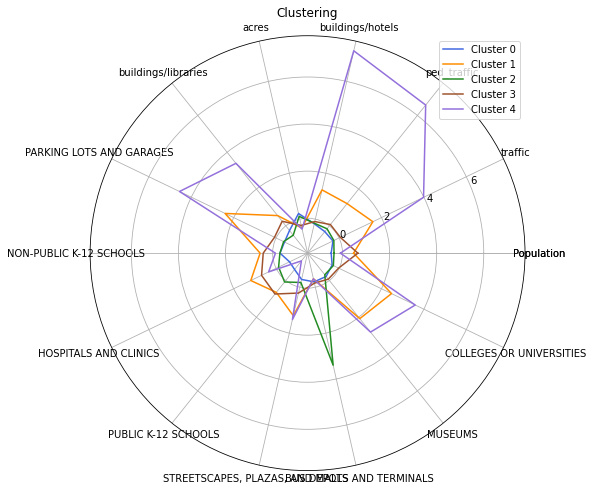

In [11]:
radar_plot(X_std, clusters)